# Hand Fans - Review Analysis
https://www.etsy.com/shop/Olele

![Olele](img/olele.jpg)

## Import the data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olele = pd.read_csv("olele-reviews-all.csv", usecols=["name_date", "text"])
olele

,name_date,text
0,"Carolinaon Nov 1, 2022",As usual the quality is sturdy yet elegant and...
1,"Amy Annetteon Sep 3, 2022",I bought this fan to bring to tango and swing ...
2,"Maryon Aug 31, 2022",LOVELY! I think this is my 4th fan? Complimen...
3,"Eni Aon Aug 31, 2022","Very beautiful fan, great quality and the colo..."
4,"hredmondson Jun 11, 2022",This is the second fan I've bought for myself ...
...,...,...
321,"Anonymous on Jun 18, 2010",Gorgeous! Love it! Just in time for the summer...
322,"Anonymous on Jun 15, 2010",Really nice communication with Karmele Luqui. ...
323,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...
324,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...


## Data processing

In [3]:
# Split name and date
olele[["name", "date"]] = olele["name_date"].str.split(pat="on ", expand=True)
olele

,name_date,text,name,date
0,"Carolinaon Nov 1, 2022",As usual the quality is sturdy yet elegant and...,Carolina,"Nov 1, 2022"
1,"Amy Annetteon Sep 3, 2022",I bought this fan to bring to tango and swing ...,Amy Annette,"Sep 3, 2022"
2,"Maryon Aug 31, 2022",LOVELY! I think this is my 4th fan? Complimen...,Mary,"Aug 31, 2022"
3,"Eni Aon Aug 31, 2022","Very beautiful fan, great quality and the colo...",Eni A,"Aug 31, 2022"
4,"hredmondson Jun 11, 2022",This is the second fan I've bought for myself ...,hredmonds,"Jun 11, 2022"
...,...,...,...,...
321,"Anonymous on Jun 18, 2010",Gorgeous! Love it! Just in time for the summer...,Anonymous,"Jun 18, 2010"
322,"Anonymous on Jun 15, 2010",Really nice communication with Karmele Luqui. ...,Anonymous,"Jun 15, 2010"
323,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010"
324,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010"


In [4]:
# Convert date to datetime type
olele["datetime"] = pd.to_datetime(olele["date"])
olele

,name_date,text,name,date,datetime
0,"Carolinaon Nov 1, 2022",As usual the quality is sturdy yet elegant and...,Carolina,"Nov 1, 2022",2022-11-01
1,"Amy Annetteon Sep 3, 2022",I bought this fan to bring to tango and swing ...,Amy Annette,"Sep 3, 2022",2022-09-03
2,"Maryon Aug 31, 2022",LOVELY! I think this is my 4th fan? Complimen...,Mary,"Aug 31, 2022",2022-08-31
3,"Eni Aon Aug 31, 2022","Very beautiful fan, great quality and the colo...",Eni A,"Aug 31, 2022",2022-08-31
4,"hredmondson Jun 11, 2022",This is the second fan I've bought for myself ...,hredmonds,"Jun 11, 2022",2022-06-11
...,...,...,...,...,...
321,"Anonymous on Jun 18, 2010",Gorgeous! Love it! Just in time for the summer...,Anonymous,"Jun 18, 2010",2010-06-18
322,"Anonymous on Jun 15, 2010",Really nice communication with Karmele Luqui. ...,Anonymous,"Jun 15, 2010",2010-06-15
323,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010",2010-06-12
324,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010",2010-06-12


In [5]:
# Rearrange dataframe
olele = olele.iloc[:, [4, 2, 1]]
olele = olele.rename(columns={"datetime": "date"})
olele = olele.set_index("date")
olele

,name,text
date,,
2022-11-01,Carolina,As usual the quality is sturdy yet elegant and...
2022-09-03,Amy Annette,I bought this fan to bring to tango and swing ...
2022-08-31,Mary,LOVELY! I think this is my 4th fan? Complimen...
2022-08-31,Eni A,"Very beautiful fan, great quality and the colo..."
2022-06-11,hredmonds,This is the second fan I've bought for myself ...
...,...,...
2010-06-18,Anonymous,Gorgeous! Love it! Just in time for the summer...
2010-06-15,Anonymous,Really nice communication with Karmele Luqui. ...
2010-06-12,Anonymous,A huge WOW when I just got them! The fans are ...


In [6]:
olele.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 2022-11-01 to 2010-06-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    326 non-null    object
 1   text    290 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


In [7]:
# Override missing values for BOW with CountVectorizer (below)
olele = olele.fillna("")

In [8]:
olele.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 2022-11-01 to 2010-06-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    326 non-null    object
 1   text    326 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


## Data analysis

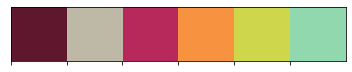

In [51]:
# Define project palette
palette_olele = ["#5e172d", "#beb9a6", "#b7295a", "#f69240", "#ced64b", "#91d8ae"]

# Plot palette
sns.palplot(sns.color_palette(palette_olele))

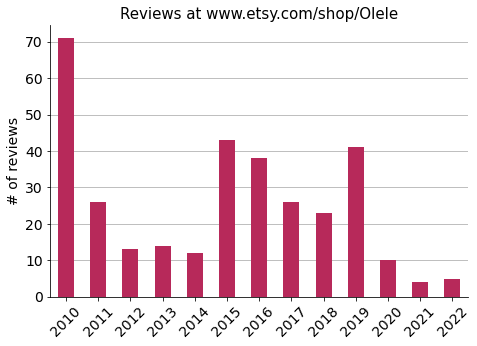

In [52]:
reviews_yearly = olele.groupby(olele.index.year)["name"].count()

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

reviews_yearly.plot(ax=ax, kind="bar", color=palette_olele[2])

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Reviews at www.etsy.com/shop/Olele", size=15)
ax.set_xlabel("")
ax.set_ylabel("# of reviews", size=14)
sns.despine()

plt.show()

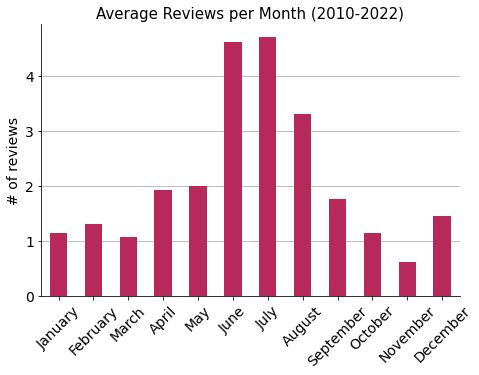

In [53]:
# Number of years
nbr_years = len(olele.index.year.unique())

# Montly average
reviews_monthly_avg = olele.groupby(olele.index.month)["name"].count() / nbr_years
reviews_monthly_avg

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

reviews_monthly_avg.plot(ax=ax, kind="bar", color=palette_olele[2])

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.set_xticklabels(months, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Average Reviews per Month (2010-2022)", size=15)
ax.set_xlabel("")
ax.set_ylabel("# of reviews", size=14)
sns.despine()

plt.show()


In [11]:
# Top reviewers
reviewers = olele.value_counts("name")
reviewers

name
Anonymous     123
Cynthia        12
SamanthaMG     10
Catherine       6
Melissa         5
             ... 
Hola10          1
Heather         1
Genevieve       1
Gabrielle       1
福島 圭子           1
Length: 131, dtype: int64

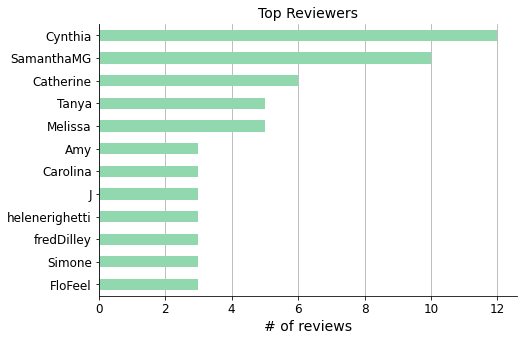

In [56]:
# Top reviewers: 3 reviews or more
reviewers_top = reviewers[1:13]

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

reviewers_top.sort_values().plot(ax=ax, kind="barh", color=palette_olele[5])

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Top Reviewers", size=14)
ax.set_xlabel("# of reviews", fontsize=14)
ax.set_ylabel("")
sns.despine()

plt.show()

In [13]:
# Longest review
longest_review_index = olele["text"].str.len().sort_values(ascending=False).index[0]
olele[olele.index == longest_review_index]

,name,text
date,,
2020-03-22,Friedrich,I was looking for the perfect fan for a man li...


In [14]:
longest_review_full_text = list(olele[olele.index == longest_review_index]["text"])[0]
longest_review_full_text

"I was looking for the perfect fan for a man like me. Then I found Karmeles shop and this wonderfully beautiful accessory. And I was thrilled with him in a split of a second. Blue is my favorite color and the pattern immediately made me think of a night sky shining with thousands of stars. Bingo! Hit! It had to be! Karmele made the fan very clean and simply perfect. He is delivered in a very nice and fine dark blue leather pocket. So now I can keep him safely at all times. An absolutely perfect combination, in my opinion. I can't wait to use him on a sunny spring day. We had it yesterday, but with 5 degrees and cool wind... I am absolutely certain, that we will have warmer temperatures very soon. Now I wish Karmele continued success and that she and all her loved ones stay healthy. Kind regards, Friedrich"

## Sentiment analysis

### Rule/lexicon-based

In [15]:
# !pip install textblob

In [16]:
# Import the required packages
from textblob import TextBlob

In [17]:
blob = TextBlob(longest_review_full_text)
blob.sentiment

Sentiment(polarity=0.49115150226757365, subjectivity=0.6157823129251702)

In [18]:
# for sentence in blob.sentences:
#     print(sentence.sentiment.polarity)

In [19]:
# !pip install wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
cloud = WordCloud(background_color="white").generate(longest_review_full_text)

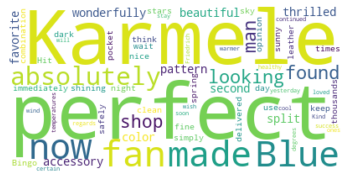

In [22]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Bag-of-words (BOW)
Create a bag-of-words representation of the reviews.

In [23]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)

# Fit the vectorizer
vect.fit(olele["text"])

# Transform the review column
X_review = vect.transform(olele["text"])

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df

,absolutely,again,also,am,an,and,are,as,at,be,...,wait,was,well,when,will,with,wonderful,work,wow,you
0,0,0,0,0,0,3,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,4,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,0,0,0,1,0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
323,0,0,0,0,0,2,1,0,0,0,...,0,2,0,1,0,1,0,0,1,1
324,0,0,0,0,0,2,1,0,0,0,...,0,2,0,1,0,1,0,0,1,1


## Build new features
Enrich the existing dataset with features related to the text column (capturing the sentiment).

- How long is each review?

A first standard step when working with text is to tokenize it, in other words, split a bigger string into individual strings, which are usually single words (tokens)

In [27]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mikel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
word_tokenize(longest_review_full_text)[:10]

['I', 'was', 'looking', 'for', 'the', 'perfect', 'fan', 'for', 'a', 'man']

In [29]:
# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in olele["text"]]

# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
olele['n_words'] = len_tokens
olele.head()

,name,text,n_words
date,,,
2022-11-01,Carolina,As usual the quality is sturdy yet elegant and...,48
2022-09-03,Amy Annette,I bought this fan to bring to tango and swing ...,51
2022-08-31,Mary,LOVELY! I think this is my 4th fan? Complimen...,13
2022-08-31,Eni A,"Very beautiful fan, great quality and the colo...",19
2022-06-11,hredmonds,This is the second fan I've bought for myself ...,29


## Identify the language

In [30]:
# !pip install langdetect

In [31]:
# Import the language detection function and package
from langdetect import detect_langs

In [32]:
languages = [] 

# Loop over the rows of the dataset and append  
for row in range(len(olele)):
    if olele["text"][row] == "":
        languages.append([])
    else:
        languages.append(detect_langs(olele["text"][row]))

languages

[[en:0.9999978881653537],
 [en:0.9999938609572108],
 [en:0.9999959932059433],
 [en:0.9999963523115993],
 [en:0.9999966050784683],
 [en:0.9999971495208053],
 [en:0.9999969698500583],
 [en:0.9999975851300964],
 [en:0.9999980715483267],
 [en:0.9999953438991978],
 [en:0.9999968030041618],
 [],
 [en:0.9999975222018546],
 [en:0.9999969267198526],
 [en:0.9999958215294349],
 [en:0.9999947158447406],
 [en:0.99999785592472],
 [en:0.9999968210302916],
 [en:0.9999970691618562],
 [en:0.9999964365327867],
 [en:0.9999974829702671],
 [en:0.9999974961550226],
 [en:0.999997457494414],
 [en:0.9999967252067148],
 [en:0.9999949221083864],
 [],
 [],
 [],
 [en:0.9999962138018159],
 [en:0.9999961194907367],
 [en:0.9999955308047171],
 [en:0.9999967455900275],
 [en:0.9999956560137241],
 [en:0.9999964449169104],
 [en:0.9999973730173555],
 [en:0.9999940042260971],
 [],
 [],
 [en:0.9999970744414609],
 [en:0.9999946767795328],
 [en:0.9999951391080123],
 [en:0.9999977746259765],
 [en:0.9999987444511139],
 [en:0.9999

In [33]:
# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]
languages

['en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 ']',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 ']',
 'en',
 ']',
 'en',
 'en',
 ']',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'ro',
 'en',
 ']',
 'en',
 'en',
 'en',
 'en',
 ']',
 'hu',
 'en',
 'en',
 'en',
 'en',
 'en',
 'pt',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 ']',
 'fr',
 ']',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 ']',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 ']',
 'en',
 'en',
 'en',
 'en',
 'en',
 ']',
 'en',
 'en',
 '

In [34]:
# Assign the list to a new feature 
olele['language'] = languages
olele

,name,text,n_words,language
date,,,,
2022-11-01,Carolina,As usual the quality is sturdy yet elegant and...,48,en
2022-09-03,Amy Annette,I bought this fan to bring to tango and swing ...,51,en
2022-08-31,Mary,LOVELY! I think this is my 4th fan? Complimen...,13,en
2022-08-31,Eni A,"Very beautiful fan, great quality and the colo...",19,en
2022-06-11,hredmonds,This is the second fan I've bought for myself ...,29,en
...,...,...,...,...
2010-06-18,Anonymous,Gorgeous! Love it! Just in time for the summer...,13,en
2010-06-15,Anonymous,Really nice communication with Karmele Luqui. ...,55,en
2010-06-12,Anonymous,A huge WOW when I just got them! The fans are ...,43,en


In [35]:
n_by_lng = olele["language"].value_counts()
n_by_lng = n_by_lng[n_by_lng.index != "]"]
n_by_lng = n_by_lng.to_frame()
n_by_lng

,language
en,273
ro,6
so,6
hu,2
pt,1
fr,1
tr,1


In [39]:
key = {"en": "English", "ro": "Romanian", "so": "Somali",
       "hu": "Hungarian", "id": "Indonesian", "pt": "Portuguese", "fr": "French",
       "tr": "Turkish"}

key["en"]

'English'

In [40]:
n_by_lng.index

Index(['en', 'ro', 'so', 'hu', 'pt', 'fr', 'tr'], dtype='object')

In [41]:
n_by_lng["lang"] = [key[lang] for lang in n_by_lng.index]
n_by_lng

,language,lang
en,273,English
ro,6,Romanian
so,6,Somali
hu,2,Hungarian
pt,1,Portuguese
fr,1,French
tr,1,Turkish


## Stopwords

In [42]:
from wordcloud import STOPWORDS

Wordcloud without stopwords

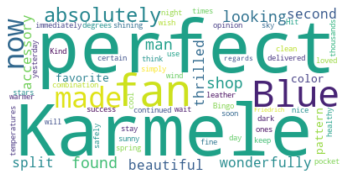

In [43]:
cloud = WordCloud(background_color="white").generate(longest_review_full_text)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wprdcloud with stopwords:

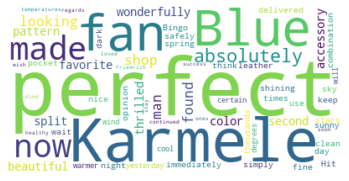

In [44]:
cloud = WordCloud(background_color="white", stopwords=STOPWORDS).generate(longest_review_full_text)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

BOW with stopwords

In [45]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [46]:
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100, stop_words=ENGLISH_STOP_WORDS)

# Fit the vectorizer
vect.fit(olele["text"])

# Transform the review column
X_review = vect.transform(olele["text"])

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
X_df

,absolutely,bag,beautiful,beautifully,best,bought,buy,came,carry,case,...,using,ve,wait,wax,way,wonderful,wood,wooden,work,wow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
323,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
324,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Vectorize using Token pattern

In [50]:
# Build the first vectorizer
vect1 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS).fit(olele["text"])
vect1.transform(olele["text"])

# Build the second vectorizer
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS,
                        token_pattern=r'\b[^\d\W][^\d\W]').fit(olele["text"])
vect2.transform(olele["text"])

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names_out()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names_out()))

Length of vectorizer 1:  763
Length of vectorizer 2:  138
